In [44]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [74]:
# Construct a list that contains the number of neurons of each layer in your network.
structure = input("Enter the number of neurons of each layer in your network").split(' ')
structure = [int(x) for x in structure]
print(structure)    

[4, 4, 4, 4, 4, 4, 3]


In [75]:
# Construct a list that contains all the bias vectors of your network(_n means it has all vectors)
np.random.seed(123)
B_n = [np.random.randn(l, 1) for l in structure[1:]]
print("bias vector of each layer\n")
for B in B_n:
    print(B)
    print()

bias vector of each layer

[[-1.0856306 ]
 [ 0.99734545]
 [ 0.2829785 ]
 [-1.50629471]]

[[-0.57860025]
 [ 1.65143654]
 [-2.42667924]
 [-0.42891263]]

[[ 1.26593626]
 [-0.8667404 ]
 [-0.67888615]
 [-0.09470897]]

[[ 1.49138963]
 [-0.638902  ]
 [-0.44398196]
 [-0.43435128]]

[[2.20593008]
 [2.18678609]
 [1.0040539 ]
 [0.3861864 ]]

[[ 0.73736858]
 [ 1.49073203]
 [-0.93583387]]



In [76]:
# Construct a list that contains all the weight matrices of your network(_n means it has all matrices)
np.random.seed(123)
W_n = [np.random.randn(l, next_l) for l, next_l in zip(structure[:-1], structure[1:])]
print("weight matrix of each layer\n")
for W in W_n:
    print(W)
    print()

weight matrix of each layer

[[-1.0856306   0.99734545  0.2829785  -1.50629471]
 [-0.57860025  1.65143654 -2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404  -0.67888615 -0.09470897]
 [ 1.49138963 -0.638902   -0.44398196 -0.43435128]]

[[ 2.20593008  2.18678609  1.0040539   0.3861864 ]
 [ 0.73736858  1.49073203 -0.93583387  1.17582904]
 [-1.25388067 -0.6377515   0.9071052  -1.4286807 ]
 [-0.14006872 -0.8617549  -0.25561937 -2.79858911]]

[[-1.7715331  -0.69987723  0.92746243 -0.17363568]
 [ 0.00284592  0.68822271 -0.87953634  0.28362732]
 [-0.80536652 -1.72766949 -0.39089979  0.57380586]
 [ 0.33858905 -0.01183049  2.39236527  0.41291216]]

[[ 0.97873601  2.23814334 -1.29408532 -1.03878821]
 [ 1.74371223 -0.79806274  0.02968323  1.06931597]
 [ 0.89070639  1.75488618  1.49564414  1.06939267]
 [-0.77270871  0.79486267  0.31427199 -1.32626546]]

[[ 1.41729905  0.80723653  0.04549008 -0.23309206]
 [-1.19830114  0.19952407  0.46843912 -0.83115498]
 [ 1.16220405 -1.09720305 -2.12310035  1.0397

##### Load training and test datasets

In [65]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [66]:
data = load_iris()['data']
target = load_iris()['target']

print(type(data), type(target))
print(data.shape, target.shape)
print(len(data), len(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4) (150,)
150 150


In [67]:
ind = np.arange(150)
np.random.shuffle(ind)
indexes = ind.tolist()
print(type(indexes))
print(indexes)

<class 'list'>
[84, 80, 137, 66, 34, 71, 72, 95, 93, 19, 145, 69, 111, 64, 146, 136, 62, 32, 52, 20, 4, 105, 22, 21, 85, 96, 82, 89, 112, 31, 42, 90, 53, 39, 10, 114, 78, 26, 11, 57, 122, 123, 127, 106, 125, 97, 116, 140, 2, 37, 50, 73, 104, 100, 126, 24, 113, 128, 33, 23, 135, 121, 41, 55, 92, 91, 79, 81, 130, 75, 131, 124, 8, 58, 77, 108, 36, 63, 28, 13, 118, 88, 138, 44, 132, 76, 107, 60, 7, 30, 68, 119, 139, 29, 35, 0, 142, 45, 144, 40, 59, 15, 46, 134, 5, 16, 47, 65, 109, 99, 74, 110, 61, 17, 38, 27, 54, 141, 70, 83, 102, 149, 87, 9, 6, 94, 120, 115, 147, 133, 98, 148, 67, 3, 86, 143, 48, 117, 51, 1, 18, 12, 49, 56, 25, 101, 43, 129, 103, 14]


In [68]:
# Just pick up 5 indexes out of dataset randomly
ind = np.arange(150)
np.random.shuffle(ind)
indexes = ind.tolist()

data = data[indexes]
target = target[indexes]

print(data)
print()
print(target)

[[5.  3.5 1.6 0.6]
 [5.6 3.  4.5 1.5]
 [6.3 3.3 6.  2.5]
 [5.4 3.4 1.7 0.2]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [4.4 2.9 1.4 0.2]
 [6.3 2.5 4.9 1.5]
 [7.2 3.  5.8 1.6]
 [7.2 3.6 6.1 2.5]
 [5.9 3.  5.1 1.8]
 [4.9 2.5 4.5 1.7]
 [6.1 3.  4.6 1.4]
 [6.7 3.  5.  1.7]
 [5.7 2.5 5.  2. ]
 [4.8 3.4 1.6 0.2]
 [6.3 2.5 5.  1.9]
 [6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [4.9 3.1 1.5 0.1]
 [6.4 3.1 5.5 1.8]
 [6.9 3.2 5.7 2.3]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.6 3.  4.4 1.4]
 [5.2 3.5 1.5 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [6.8 2.8 4.8 1.4]
 [6.1 2.9 4.7 1.4]
 [5.4 3.4 1.5 0.4]
 [6.2 3.4 5.4 2.3]
 [5.1 3.8 1.6 0.2]
 [5.6 2.7 4.2 1.3]
 [6.1 2.6 5.6 1.4]
 [4.9 2.4 3.3 1. ]
 [4.6 3.1 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [6.3 3.3 4.7 1.6]
 [6.4 2.8 5.6 2.2]
 [6.4 3.2 4.5 1.5]
 [4.3 3.  1.1 0.1]
 [6.3 2.7 4.9 1.8]
 [5.  3.4 1.6 0.4]
 [5.5 3.5 1.3 0.2]
 [4.6 3.4 1.4 0.3]
 [5.8 2.8 5.1 2.4]
 [5.8 2.7 5.1 1.9]
 [6.  3.  4.8 1.8]
 [5.  2.3 3.3 1. ]
 [4.5 2.3 1.3 0.3]
 [5.2 2.7 3.9 1.4]
 [4.6 3.2 1.

In [69]:
X = data
print(X)
print()

Y = np.zeros((len(X), 3))
for i in range(len(Y)):
    for j in range(len(Y[i])):
        Y[i, target[i]] = 1
print(Y)

[[5.  3.5 1.6 0.6]
 [5.6 3.  4.5 1.5]
 [6.3 3.3 6.  2.5]
 [5.4 3.4 1.7 0.2]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [4.4 2.9 1.4 0.2]
 [6.3 2.5 4.9 1.5]
 [7.2 3.  5.8 1.6]
 [7.2 3.6 6.1 2.5]
 [5.9 3.  5.1 1.8]
 [4.9 2.5 4.5 1.7]
 [6.1 3.  4.6 1.4]
 [6.7 3.  5.  1.7]
 [5.7 2.5 5.  2. ]
 [4.8 3.4 1.6 0.2]
 [6.3 2.5 5.  1.9]
 [6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [4.9 3.1 1.5 0.1]
 [6.4 3.1 5.5 1.8]
 [6.9 3.2 5.7 2.3]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.6 3.  4.4 1.4]
 [5.2 3.5 1.5 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [6.8 2.8 4.8 1.4]
 [6.1 2.9 4.7 1.4]
 [5.4 3.4 1.5 0.4]
 [6.2 3.4 5.4 2.3]
 [5.1 3.8 1.6 0.2]
 [5.6 2.7 4.2 1.3]
 [6.1 2.6 5.6 1.4]
 [4.9 2.4 3.3 1. ]
 [4.6 3.1 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [6.3 3.3 4.7 1.6]
 [6.4 2.8 5.6 2.2]
 [6.4 3.2 4.5 1.5]
 [4.3 3.  1.1 0.1]
 [6.3 2.7 4.9 1.8]
 [5.  3.4 1.6 0.4]
 [5.5 3.5 1.3 0.2]
 [4.6 3.4 1.4 0.3]
 [5.8 2.8 5.1 2.4]
 [5.8 2.7 5.1 1.9]
 [6.  3.  4.8 1.8]
 [5.  2.3 3.3 1. ]
 [4.5 2.3 1.3 0.3]
 [5.2 2.7 3.9 1.4]
 [4.6 3.2 1.

In [9]:
# B_n is a list of 3 np.ndarrays with (2, 1),(2, 1),(3, 1)
# W_n is a list of 3 np.ndarrays with (4, 2),(2, 2),(2, 3)

# X is a np.ndarray with shape (150,4)
# Y is a np.ndarray with shape (150,3)

# Z_n is a list of 3 np.ndarrays with (2,1),(2,1),(3,1)
# A_n is a list of 3 np.ndarrays with (2,1),(2,1),(3,1)

# e_Je_B_ns a list of 3 np.ndarrays with (2,1), (2,1), (3,1)
# e_Je_W_ns a list of 3 np.ndarrays with (4,2), (2,2), (2,3)

In [70]:
# Provide sigmoid and sigmoid_derivative function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

In [71]:
# Calculate the Loss
def calculate_loss(actual, expected):
    diff = np.sum(np.sqrt((actual.reshape(-1) - expected) * (actual.reshape(-1) - expected)))
    return diff

In [29]:
a = np.array([[0.3],[0.8],[0.1]])
y = [0, 1, 0]

#print(calculate_loss(a, y))
print((a.reshape(-1) - y)) 
print((a.reshape(-1) - y) * (a.reshape(-1) - y)) 
print(np.sqrt((a.reshape(-1) - y) * (a.reshape(-1) - y)))
print(np.sum(np.sqrt((a.reshape(-1) - y) * (a.reshape(-1) - y))))

print(calculate_loss(2, a, y))

[ 0.3 -0.2  0.1]
[0.09 0.04 0.01]
[0.3 0.2 0.1]
0.6
2th error : 0.6
None


In [33]:
a = [2,4,6]
np.mean(a)

4.0

In [77]:
# Set the output layer to H and let L begin from the first hidden layer(not from the input layer)
H = len(structure) - 2
learning_rate = 0.10
epochs = 100

total_error_epoch = []

for epoch in range(epochs):

    # Create a list that contains errors of all data points for each epoch
    epoch_error_list = []
    
    W_n = [np.random.randn(l, next_l) for l, next_l in zip(structure[:-1], structure[1:])]        
    B_n = [np.random.randn(l, 1) for l in structure[1:]]
    
    for x, y in zip(X, Y):     # x의 shape:(4,),  y의 shape:(3,)   
                
        # Forward Propagate
        # Create two lists that contain pre and post activation vector of each layer, respectively
        Z_n, A_n = [], []
        
        for i, (b, W) in enumerate(zip(B_n, W_n)):
            if i == 0:
                z = np.dot(np.array(W).T, x).reshape(-1, 1) + np.array(b)
            else:
                z = np.dot(np.array(W).T, a).reshape(-1, 1) + np.array(b)
            a = sigmoid(z)

            Z_n.append(z)
            A_n.append(a)
        # print(Z_n) 
        # print()  
    
    
        # Backpropagate
        # Initialize a list called e_Je_W_ns that will contain e_Je_W matrices for each layer
        e_Je_W_ns = [np.zeros(W.shape) for W in W_n]    # (4, 2), (2, 2), (2, 3)
        #for x in e_Je_W_ns:
        #    print(x.shape)
        #print()

        # Initialize a list called e_Je_B_ns that will contain e_Je_B vectors for each layer
        e_Je_B_ns = [np.zeros(B.shape) for B in B_n]    # (2, 1), (2, 1), (3, 1)
        
        for L in range(H, -1, -1):
            if L != H:
                delta = sigmoid_derivative(Z_n[L]) * np.dot(W_n[L+1], delta)
            else:
                delta = sigmoid_derivative(Z_n[L]) * (A_n[L] - y.reshape(-1, 1))
                
            e_Je_B_ns[L] = delta
            # print(f"{L} : {delta}")
            
            if L != 0:
                e_Je_W_ns[L] = np.dot(A_n[L-1], delta.T)
            else:
                e_Je_W_ns[L] = np.dot(x.reshape(-1, 1), delta.T)
    
        """
        for x in e_Je_W_ns:
            print(x)
        print()
        """
        
        
        for i, (wn, ejew, bn, ejeb) in enumerate(zip(W_n, e_Je_W_ns, B_n, e_Je_B_ns)):
            W_n[i] -= learning_rate/len(X) * ejew
            B_n[i] -= learning_rate/len(X) * ejeb
            """
            print(wn)
            print(ejew)
            print(bn)
            print(ejeb)
            print()
            """    
    
        datapoint_error = calculate_loss(A_n[-1], y)
        epoch_error_list.append(datapoint_error)
    total_errors = np.sum(epoch_error_list)
    total_error_epoch.append(total_errors)
    print(f"{epoch:3d}th epoch total error : {total_errors:.3f}")

  0th epoch total error : 235.194
  1th epoch total error : 211.389
  2th epoch total error : 241.271
  3th epoch total error : 240.826
  4th epoch total error : 209.949
  5th epoch total error : 204.991
  6th epoch total error : 224.039
  7th epoch total error : 211.863
  8th epoch total error : 225.474
  9th epoch total error : 231.961
 10th epoch total error : 236.506
 11th epoch total error : 231.299
 12th epoch total error : 190.842
 13th epoch total error : 234.386
 14th epoch total error : 250.375
 15th epoch total error : 266.382
 16th epoch total error : 234.431
 17th epoch total error : 231.430
 18th epoch total error : 245.341
 19th epoch total error : 180.126
 20th epoch total error : 248.272
 21th epoch total error : 255.820
 22th epoch total error : 257.275
 23th epoch total error : 228.100
 24th epoch total error : 213.474
 25th epoch total error : 235.303
 26th epoch total error : 216.810
 27th epoch total error : 228.879
 28th epoch total error : 206.822
 29th epoch to

In [53]:
len(X)

150

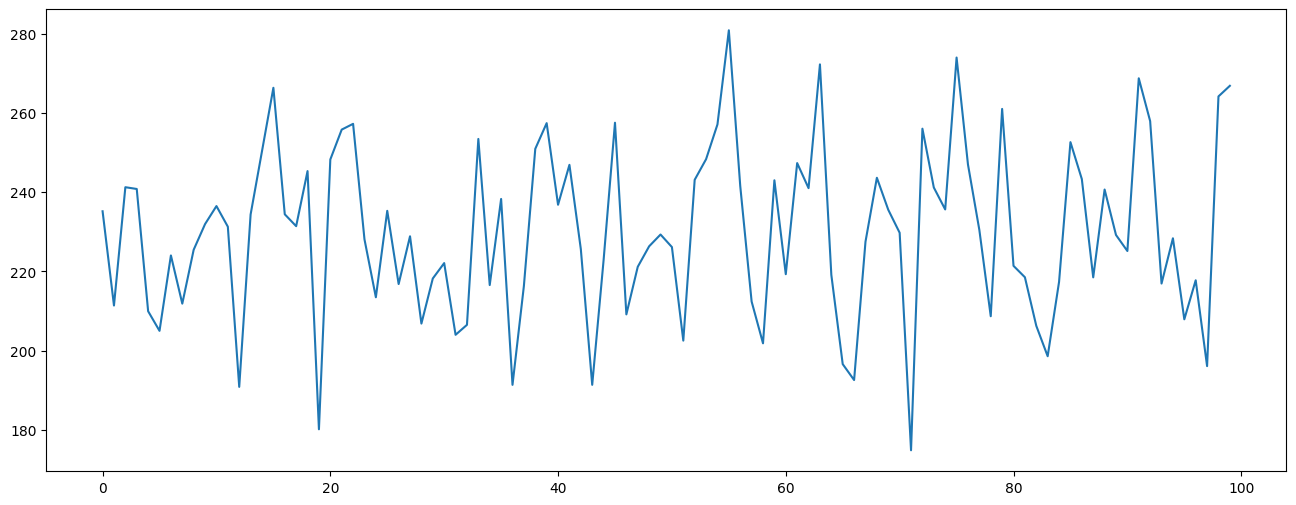

In [78]:
plt.figure(figsize=(16, 6))
plt.plot(total_error_epoch)
plt.show()